In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [233]:
# read csv
df = pd.read_csv('go_outside/csi_data.csv')

In [234]:
def parse_data(data_string):
    return data_string[1:-1].split(',')

In [235]:
df['data'] = df['data'].apply(parse_data)

In [236]:
df.columns

Index(['type', 'id', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'bandwidth',
       'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi',
       'noise_floor', 'ampdu_cnt', 'channel', 'secondary_channel',
       'local_timestamp', 'ant', 'sig_len', 'rx_state', 'len', 'first_word',
       'data'],
      dtype='object')

In [237]:
all(df['len'] == df['data'].apply(len))

True

In [238]:
df['local_timestamp'] -= df['local_timestamp'].min()

In [239]:
df2 = df.iloc[12*76:76*50]

In [240]:
CSI_data = df['data']
CSI_data2 = df2['data']

In [241]:
CSI_data = CSI_data.apply(lambda data: [complex(int(data[i]), int(data[i+1])) for i in range(0, len(data), 2)]).to_list()
CSI_data2 = CSI_data2.apply(lambda data: [complex(int(data[i]), int(data[i+1])) for i in range(0, len(data), 2)]).to_list()


In [242]:
CSI_data = np.array(CSI_data)
CSI_data2 = np.array(CSI_data2)
CSI_data.shape, CSI_data2.dtype

((6789, 64), dtype('complex128'))

In [243]:
CSI_data.shape, CSI_data2.shape

((6789, 64), (2888, 64))

In [244]:
from mpl_toolkits import axes_grid1


In [245]:
CSI_amplitude = np.abs(CSI_data)
CSI_amplitude2 = np.abs(CSI_data2)
CSI_amplitude.shape, CSI_amplitude.dtype

((6789, 64), dtype('float64'))

In [246]:
def add_colorbar(im, ax, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(ax)
    width = axes_grid1.axes_size.AxesY(ax, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    cax = divider.new_horizontal(size=width, pad=pad, pack_start=False)
    ax.figure.add_axes(cax)
    return ax.figure.colorbar(im, cax=cax, **kwargs)


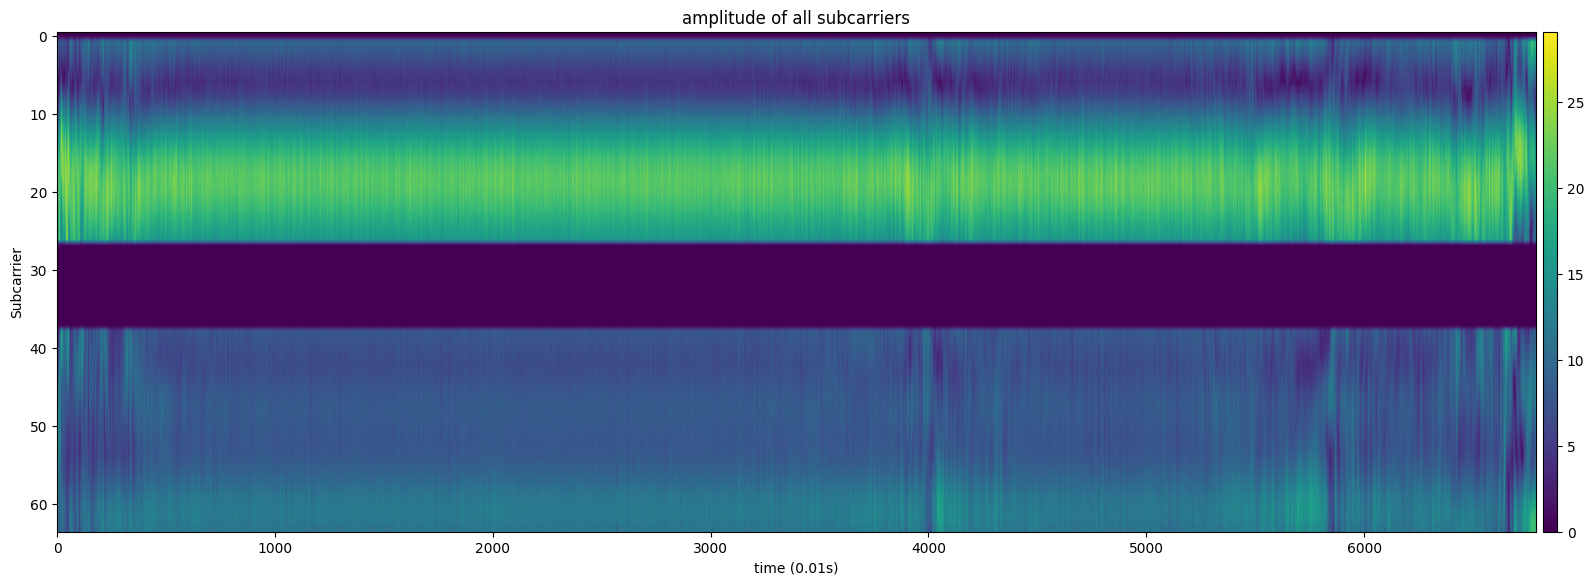

In [247]:
visualize_amp_allsubcarriers = CSI_amplitude


fig, ax1 = plt.subplots(1, 1, figsize=(1, 1))
plt.subplots_adjust(left=0.0, bottom=0.0, top=5, right=15)

im1 = ax1.imshow(visualize_amp_allsubcarriers.transpose(1, 0), aspect='auto')
ax1.set_title('amplitude of all subcarriers')
ax1.set_xlabel('time (0.01s)')
ax1.set_ylabel('Subcarrier')

add_colorbar(im1, ax1, aspect=1)

plt.show()


In [248]:
(df['local_timestamp'])

0               0
1           38488
2           51256
3           62447
4           72225
          ...    
6784    114679347
6785    114702395
6786    114712784
6787    114729148
6788    114750326
Name: local_timestamp, Length: 6789, dtype: int64

In [249]:
(590018369 - 590005601)/1000000

0.012768

In [250]:
df['local_timestamp'][:500]

0            0
1        38488
2        51256
3        62447
4        72225
        ...   
495    8594065
496    8617904
497    8627514
498    8677526
499    8694514
Name: local_timestamp, Length: 500, dtype: int64

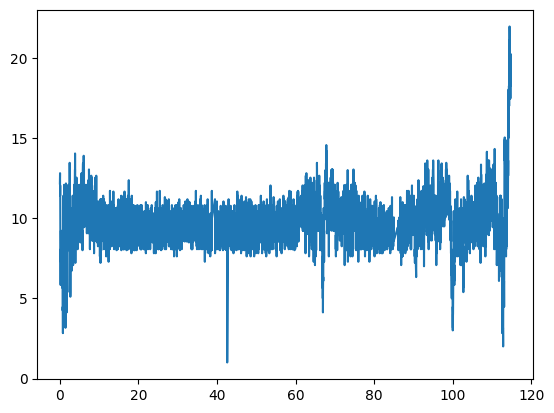

In [251]:
plt.plot(df['local_timestamp']/1000000, CSI_amplitude[:, 1])

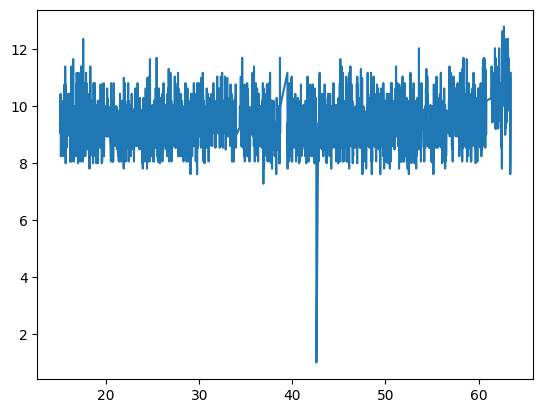

In [252]:
plt.plot(df2['local_timestamp']/1000000, CSI_amplitude2[:, 1])


In [265]:
# save data to csv
df2.to_csv('no one/csi_data.csv', index=False)

In [254]:
len(df2)

2888

In [255]:
from statsmodels import api

In [256]:
from scipy.signal import find_peaks

In [257]:
y = CSI_amplitude[1:58, 1]

In [258]:
sr = 1000000/(df['local_timestamp'][2] - df['local_timestamp'][1])

In [259]:
sr

78.32080200501254

In [260]:
sr

78.32080200501254

In [261]:
autocorr = api.tsa.stattools.acf(y, nlags=int(sr*8))

In [262]:
int(sr*8)

626

In [263]:
# Find the peaks in autocorr
peaks, _ = find_peaks(autocorr)

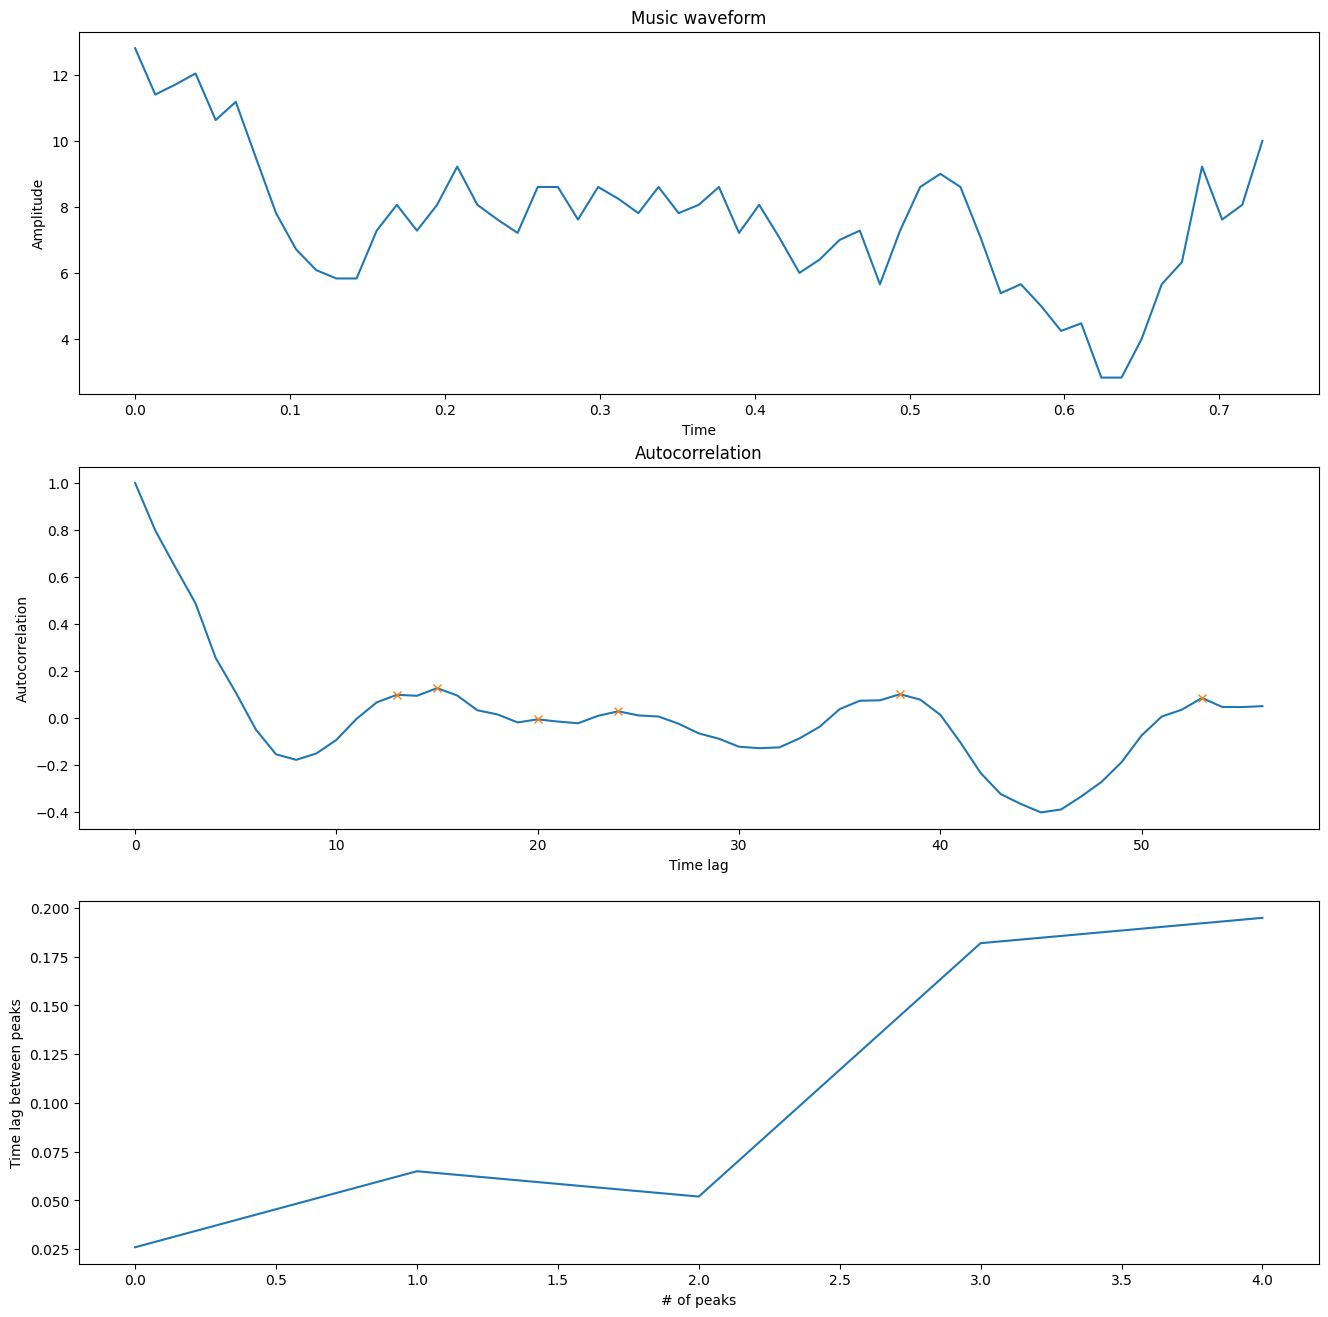

In [264]:
# Calculate the time lag
time_list = np.linspace(0, y.shape[0]/sr, num=y.shape[0])
time_diff = np.diff(time_list[peaks])

# Plot the signal and the time lag
fig, bx = plt.subplots(nrows=3, ncols=1, figsize=(16, 16))
bx[0].plot(time_list, y)
bx[0].set(xlabel='Time', ylabel='Amplitude')
bx[0].set_title('Music waveform')
bx[1].plot(autocorr)
bx[1].plot(peaks, autocorr[peaks], "x")
bx[1].set(xlabel='Time lag', ylabel='Autocorrelation')
bx[1].set_title('Autocorrelation')
bx[2].plot(time_diff)
# change y lim
# bx[2].set_ylim(0.05, 0.15)
bx[2].set(xlabel='# of peaks', ylabel='Time lag between peaks')
plt.show()